In [1]:
import pandas as pd
import numpy as np
import datetime
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller, acf, pacf
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pylab import rcParams
import matplotlib
import folium
import warnings
import matplotlib.ticker as ticker
from sklearn.model_selection import TimeSeriesSplit
import pmdarima as pm
%matplotlib inline

In [2]:
# import data from CA, CT, TX, FL, NY, NJ 
ca = pd.read_csv('data/ca_ev_registrations_public.csv')
# nj = pd.read_csv('data/nj_ev_registrations_public.csv')
# ny = pd.read_csv('data/ny_ev_registrations_public.csv')
# tx = pd.read_csv('data/tx_ev_registrations_public.csv')
# fl = pd.read_csv('data/fl_ev_registrations_public.csv')
# ct = pd.read_csv('data/ct_ev_registrations_public.csv')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# ca.info()
# # 2542443 entries in CA
# nj.info()
# # NJ has 309872 entries
# ny.info()
# tx.info()
# ct.info()
# fl.info()
# # ca['Registration Valid Date'].value_counts()

In [4]:
# Create Data frame with years and amount of registered vehicles in that year
ca_years = pd.DataFrame(ca['Registration Valid Date'].value_counts().reset_index().values, columns=["Year", "Registered Vehicles"])
ca_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 11 non-null     object
 1   Registered Vehicles  11 non-null     object
dtypes: object(2)
memory usage: 304.0+ bytes


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11 entries, 2020-01-01 to 2010-01-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Registered Vehicles  11 non-null     object
dtypes: object(1)
memory usage: 176.0+ bytes


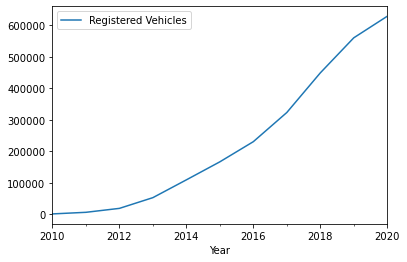

In [5]:
# As we can see, data is not stationary. 
ca_df = pd.DataFrame(ca_years['Registered Vehicles'])
ca_df = ca_df.set_axis(pd.to_datetime(ca_years['Year']))
ca_df.plot()
ca_df.info()
ca_df = ca_df.sort_values(by=['Registered Vehicles'], ascending = True)

In [6]:
ca_df = ca_df.astype(float)

In [10]:
ca_df = ca_df.resample('M').interpolate()
ca_df

AttributeError: 'DatetimeIndexResampler' object has no attribute 'resample'

,Registered Vehicles
Year,
2010-01-31,"AxesSubplot(0.125,0.2;0.775x0.68)"
2010-02-28,"AxesSubplot(0.125,0.2;0.775x0.68)"
2010-03-31,"AxesSubplot(0.125,0.2;0.775x0.68)"
2010-04-30,"AxesSubplot(0.125,0.2;0.775x0.68)"
2010-05-31,"AxesSubplot(0.125,0.2;0.775x0.68)"
...,...
2019-09-30,"AxesSubplot(0.125,0.2;0.775x0.68)"
2019-10-31,"AxesSubplot(0.125,0.2;0.775x0.68)"
2019-11-30,"AxesSubplot(0.125,0.2;0.775x0.68)"


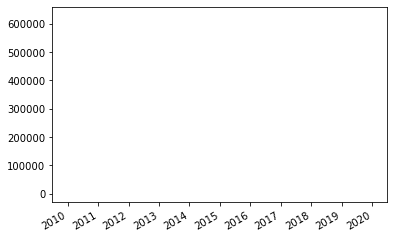

In [8]:
ca_df.plot()

In [9]:
catest = adfuller(ca_df)
display(catest)
# P value changed when resampled to Months 
# Pvalue - 0.99624347392997485

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (121, 2) + inhomogeneous part.

# Modeling

In [ ]:
catrain = ca_df['2010':'2018']
catest = ca_df['2019':'2020']

In [ ]:


split = TimeSeriesSplit()
for train_ind, val_ind in split.split(catrain):
    praint(train_ind, val_ind)